# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

How many countries present

In [4]:
print(len(set(df.country)))

219


Timespan of the data

In [5]:
timespan = df['year'].max() - df['year'].min()
print(f"{timespan} years")

33 years


Checking whether each country has a row for each year present and if not what countries do not

In [6]:
#Does each country's set of years == the set of integers from 1980 to 2013?

#Select the first two columns and put into separate df
country_year = df.loc[:,['country', 'year']]
country_year.head(5)

#Take all the years for each country and compare them to the set of integers from 1980 to 2013
#Done by filtering the data by country one by one
for country in set(df.country):
    if set(country_year[country_year['country'] == country]['year']) != set(range(1980,2014)):
        print(f'{country} does not have a row for each year')

Curacao does not have a row for each year
Serbia does not have a row for each year
Netherlands Antilles does not have a row for each year
South Sudan does not have a row for each year
Serbia & Montenegro does not have a row for each year
Sint Maarten (Dutch part) does not have a row for each year
Timor-Leste does not have a row for each year
Montenegro does not have a row for each year
Bonaire, Saint Eustatius and Saba does not have a row for each year


How many rows have at least one non-null value across the columns 3-57

In [7]:
#Drop all rows that have all NaN values in columns 3-57, then count the number of rows remaining

non_null = df.iloc[:, 3:58]
non_null.dropna(axis = 0, how = "all", inplace = True)
non_null_rows = len(non_null)
print(f'There are {non_null_rows} rows with at least 1 non-null value')

There are 3484 rows with at least 1 non-null value


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [55]:
#Melt the dataframe into a compact format
df_long = pd.melt(df, id_vars = ['country', 'year'], var_name = 'group', value_name = 'cases')
df_long.head(5)

,country,year,group,cases
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN


In [56]:
#Extract the compact group column into multiple subgroup columns to made the data cleaner for analysis
#Replace the strings with lists via a dictionary
grouping_map = {
    'new_sp_m014': 'Pulmonary Smear (+)_m_0-14',
    'new_sp_m1524': 'Pulmonary Smear (+)_m_15-24',
    'new_sp_m2534': 'Pulmonary Smear (+)_m_25-34',
    'new_sp_m3544': 'Pulmonary Smear (+)_m_35-44',
    'new_sp_m4554': 'Pulmonary Smear (+)_m_45-54',
    'new_sp_m5564': 'Pulmonary Smear (+)_m_55-64',
    'new_sp_m65': 'Pulmonary Smear (+)_m_65+',    
    'new_sp_f014': 'Pulmonary Smear (+)_f_0-14',
    'new_sp_f1524': 'Pulmonary Smear (+)_f_15-24',
    'new_sp_f2534': 'Pulmonary Smear (+)_f_25-34',
    'new_sp_f3544': 'Pulmonary Smear (+)_f_35-44',
    'new_sp_f4554': 'Pulmonary Smear (+)_f_45-54',
    'new_sp_f5564': 'Pulmonary Smear (+)_f_55-64',
    'new_sp_f65': 'Pulmonary Smear (+)_f_65+',
    'new_sn_m014': 'Pulmonary Smear (-)_m_0-14',
    'new_sn_m1524': 'Pulmonary Smear (-)_m_15-24',
    'new_sn_m2534': 'Pulmonary Smear (-)_m_25-34',
    'new_sn_m3544': 'Pulmonary Smear (-)_m_35-44',
    'new_sn_m4554': 'Pulmonary Smear (-)_m_45-54',
    'new_sn_m5564': 'Pulmonary Smear (-)_m_55-64',
    'new_sn_m65': 'Pulmonary Smear (-)_m_65+', 
    'new_sn_f014': 'Pulmonary Smear (-)_f_0-14',
    'new_sn_f1524': 'Pulmonary Smear (-)_f_15-24',
    'new_sn_f2534': 'Pulmonary Smear (-)_f_25-34',
    'new_sn_f3544': 'Pulmonary Smear (-)_f_35-44',
    'new_sn_f4554': 'Pulmonary Smear (-)_f_45-54',
    'new_sn_f5564': 'Pulmonary Smear (-)_f_55-64',
    'new_sn_f65': 'Pulmonary Smear (-)_f_65+',
    'new_ep_m014': 'Extrapulmonary_m_0-14',
    'new_ep_m1524': 'Extrapulmonary_m_15-24',
    'new_ep_m2534': 'Extrapulmonary_m_25-34',
    'new_ep_m3544': 'Extrapulmonary_m_35-44',
    'new_ep_m4554': 'Extrapulmonary_m_45-54',
    'new_ep_m5564': 'Extrapulmonary_m_55-64',
    'new_ep_m65': 'Extrapulmonary_m_65+',
    'new_ep_f014': 'Extrapulmonary_f_0-14',
    'new_ep_f1524': 'Extrapulmonary_f_15-24',
    'new_ep_f2534': 'Extrapulmonary_f_25-34',
    'new_ep_f3544': 'Extrapulmonary_f_35-44',
    'new_ep_f4554': 'Extrapulmonary_f_45-54',
    'new_ep_f5564': 'Extrapulmonary_f_55-64',
    'new_ep_f65': 'Extrapulmonary_f_65+',
    'newrel_m014': 'Relapse_m_0-14',
    'newrel_m1524': 'Relapse_m_15-24',
    'newrel_m2534': 'Relapse_m_25-34',
    'newrel_m3544': 'Relapse_m_35-44',
    'newrel_m4554': 'Relapse_m_45-54',
    'newrel_m5564': 'Relapse_m_55-64',
    'newrel_m65': 'Relapse_m_65+',
    'newrel_f014': 'Relapse_f_0-14',
    'newrel_f1524': 'Relapse_f_15-24',
    'newrel_f2534': 'Relapse_f_25-34',
    'newrel_f3544': 'Relapse_f_35-44',
    'newrel_f4554': 'Relapse_f_45-54',
    'newrel_f5564': 'Relapse_f_55-64',
    'newrel_f65': 'Relapse_f_65+',
}
df_long = df_long.replace(to_replace = grouping_map)
df_long.head(5)

,country,year,group,cases
0,Afghanistan,1980,Pulmonary Smear (+)_m_0-14,NaN
1,Afghanistan,1981,Pulmonary Smear (+)_m_0-14,NaN
2,Afghanistan,1982,Pulmonary Smear (+)_m_0-14,NaN
3,Afghanistan,1983,Pulmonary Smear (+)_m_0-14,NaN
4,Afghanistan,1984,Pulmonary Smear (+)_m_0-14,NaN


In [57]:
#Now extract the subgroups and replace the "group" column with the relevant subgroup columns
df_long = df_long.assign(method = df_long['group'].apply(lambda x: x.split('_')[0]),
              gender = df_long['group'].apply(lambda x: x.split('_')[1]),
              age = df_long['group'].apply(lambda x: x.split('_')[2]))

#Dropping the group column and rearranging the columns for readability
df_long.drop(columns = ['group'], inplace = True)
df_long = df_long[['country', 'year', 'method', 'gender', 'age', 'cases']]

df_long.head(5)

,country,year,method,gender,age,cases
0,Afghanistan,1980,Pulmonary Smear (+),m,0-14,NaN
1,Afghanistan,1981,Pulmonary Smear (+),m,0-14,NaN
2,Afghanistan,1982,Pulmonary Smear (+),m,0-14,NaN
3,Afghanistan,1983,Pulmonary Smear (+),m,0-14,NaN
4,Afghanistan,1984,Pulmonary Smear (+),m,0-14,NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

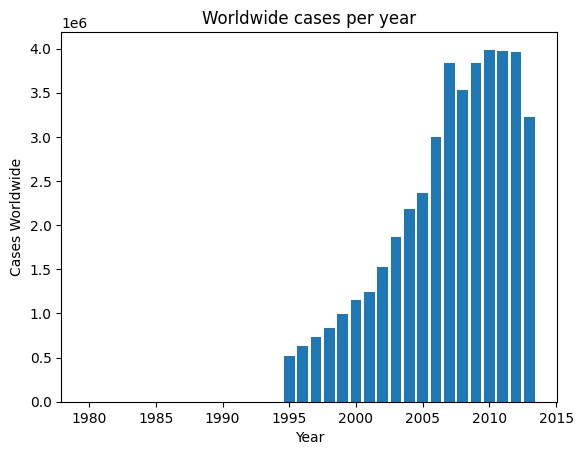

In [64]:
# Code
cases_per_year = df_long.groupby(['year']).cases.sum()
plt.bar(x = cases_per_year.index, height = cases_per_year.values)
plt.title('Worldwide cases per year')
plt.xlabel('Year')
plt.ylabel('Cases Worldwide')
plt.show()